# LINEAR REGRESSION IMPLEMENTATIONL

#### Considerations
- Using the Mean Squared Error (MSE) loss function (note that there are various types of loss functions)
 $MSE = \frac{1}{2m}\sum_{i=0}^m (y_i - h(x_i)) ²$ 
- Parameters b and w change in the loss function, so we need to find their derivatives with respect to the loss function
- Data db.csv

##### Derivative calculations for $b(baias)$ y $w(slope)$

- $db = \frac{1}{m}\sum_{i=0}^m(y_i - h(x_i))(-1)$

- $dw = \frac{1}{m}\sum_{i=0}^m(y_i - h(x_i))(-x_i)$ 

In [15]:
import numpy as np
import matplotlib.pyplot as ptl
import pandas as pd
from  sklearn.model_selection import train_test_split

#dataset
dataset = pd.read_csv('db.csv')
x = (dataset[['income']])
y = (dataset[['happiness']])

#data selection
x_data = x.values.reshape(-1,1)
y_data = y.values.reshape(-1,1)


In [16]:

# Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)


In [17]:


class LinearRegression:
    def __init__(self):
        """ WE INITIALIZE THE DATA 
        -  seed s the seed to be able to obtain the 
            values ​​of the graph and be able to buy 
        -   w and b are the values ​​initially, 
            then we will fit this data in training"""
        

        # np.random.seed(2001)
        self.w=np.random.random()
        self.b=np.random.random()

    def H(self, x):
        """Set the predictor. This is the equation of the predictor line, 
        but it will adjust as the derivatives of w and b are updated."""
        return self.w * x + self.b


    def Loss(self, x, y):
        """Calculate the Mean Squared Error (MSE). 
        The first tuple returns the MSE (scalar), while the second tuple 
        returns all the predicted y values."""

        y_pred = self.H(x)
        return (np.linalg.norm(y - y_pred)**2) / (2 * len(y)), y_pred


    def derivate(self, x, y, y_pred):
        """Calculate the derivatives of the loss function with respect to w and b.
        - dw ---> returns the derivative of the slope (w) with respect to Loss
        - db ---> returns the derivative of the bias (b) with respect to Loss"""

        dw = np.sum((y - y_pred) * (-x)) / len(y)
        db = np.sum((y - y_pred)) * (-1) / len(y)
        return dw, db

    def change_params(self, dw, db, alpha):
        """Update the parameters w and b using the learning rate (alpha).
        This acts as a dampener to prevent overly abrupt adjustments 
        when updating the parameters."""

        self.w = self.w - alpha * dw
        self.b = self.b - alpha * db
        return self.w, self.b
    def train(self, x, y, alpha, epochs):
        """Save data in lists to track the training procedure.
        - error_list ---> list of losses
        - time_stamp ---> list of epoch counts
        - params ------> list of tuples containing the updates of b and w
        """
        error_list = []  # List of losses
        time_stamp = []  # List of epoch counts
        params = []      # List of tuples containing updates of b and w
        print("Training started")
        for i in range(epochs):
            loss, y_pred = self.Loss(x, y)
            time_stamp.append(i)
            error_list.append(loss)
            dw, db = self.derivate(x, y, y_pred)
            params.append([db, dw])
            self.change_params(dw, db, alpha)

            if i % 1000 == 0:  # Display the graph every 1000 epochs
                print(f"Loss at epoch {i}: {str(loss)}")
                self.plot_line_train(x, y_pred)
        print("Training completed")
        return time_stamp, error_list, params, y_pred
    
    def test(self, x_test):
        """Takes only x_test as input. Returns:
        - test_loss -----> MSE for x_test (scalar)
        - y_pred_test ---> Predicted values for x_test, used for comparison with y_test
        """
        y_pred_test = self.H(x_test)
        test_loss = (np.linalg.norm(y_test - y_pred_test)**2) / (2 * len(y_test))
        return test_loss, y_pred_test

    def plot_error(self, time, loss):

        """Plot the graph to visualize how the loss stabilizes or not over epochs."""
        
        ptl.plot(time, loss)
        ptl.xlabel("Epochs")
        ptl.ylabel("Loss")
        ptl.show()

    def plot_line_train(self, x, y_pred):

        """Plot the graph for the training data."""

        ptl.plot(x, y_train, '*')
        ptl.plot(x, y_pred)
        ptl.title("Plt line train")
        ptl.xlabel("y_predic")
        ptl.ylabel("x")
        ptl.show()

    def plot_line_test(self, x, y_pred):

        """Plot the graph for the testing data."""

        ptl.plot(x, y_test, '*')
        ptl.plot(x, y_pred)
        ptl.title("Plt line test")
        ptl.show()
    
    def accuracy(self, y_true, y_predic, threshold=0.8):

        """Calculate the accuracy for regression data. This method uses a threshold,
        meaning a prediction is considered correct if it falls within a certain range."""

        correct_predictions = sum(abs(y_true - y_predic) <= threshold)
        total_predictions = len(y_predic)
        result_accuracy = correct_predictions / total_predictions
        return result_accuracy






###  TRAIN

Training started
Loss at epoch 0: 2.0380655445765496


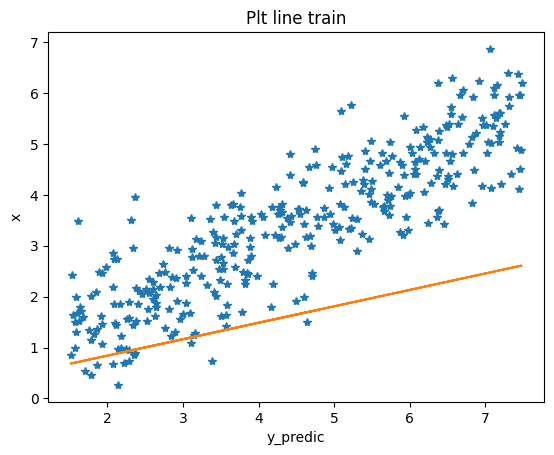

Loss at epoch 1000: 0.25764933137226254


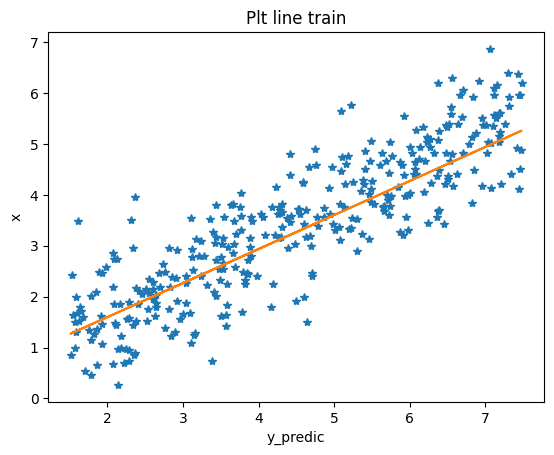

Loss at epoch 2000: 0.24331313108205446


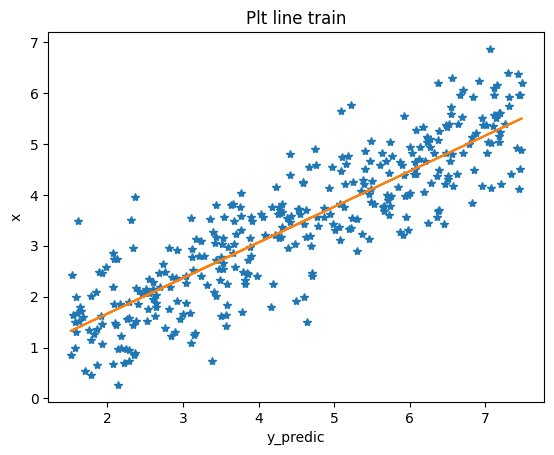

Loss at epoch 3000: 0.24318807106052154


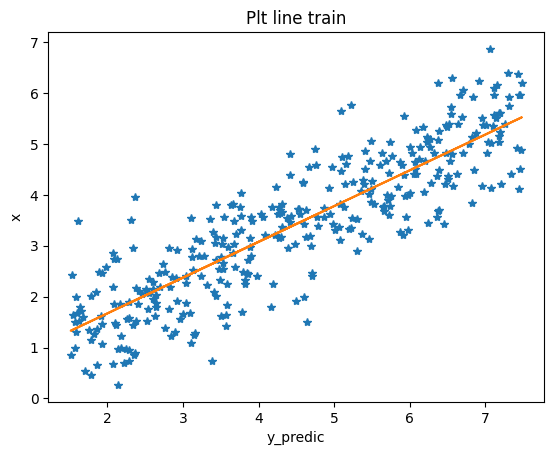

Training completed


In [18]:
# Instance
LR = LinearRegression()


# Training
time_stamp, error_list, params, y_predicho = LR.train(x_train, y_train, alpha=0.0001, epochs=4000)



### Result train

Loss vs epoch graph:


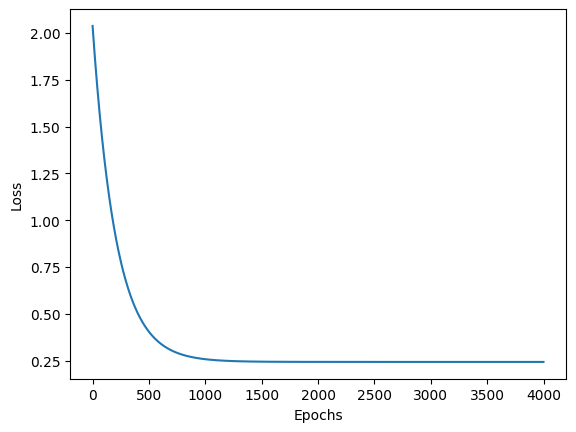

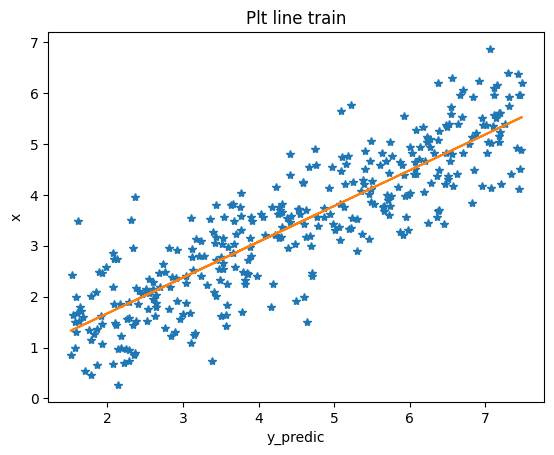

In [19]:
# Display for training
print("Loss vs epoch graph:")
LR.plot_error(time_stamp, error_list)  # Display how the error decreases over epochs

LR.plot_line_train(x_train, LR.H(x_train))  # Display how the predicted values align with the training data



### Testing

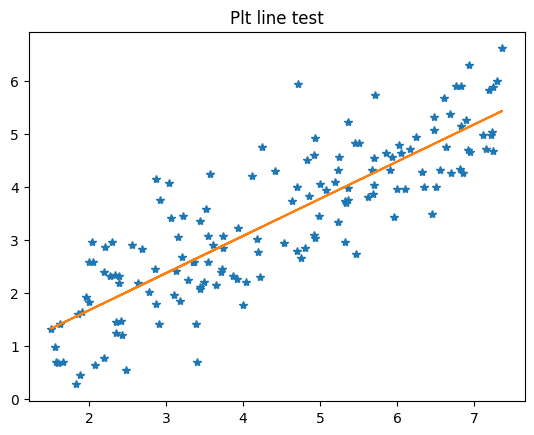

Test set error: 0.28923187266481293 and  the test_predic: [[3.24574727]
 [2.27734904]
 [3.2314805 ]
 [1.86298736]
 [1.8181721 ]
 [2.44423533]
 [4.43648548]
 [4.8370406 ]
 [1.96015591]
 [3.5238243 ]
 [4.09905029]
 [2.48461462]
 [2.89545016]
 [3.56317869]
 [2.82959608]
 [1.87992317]
 [2.57119696]
 [5.13410015]
 [2.50309561]
 [4.00033975]
 [1.90624655]
 [2.77341941]
 [2.67787657]
 [1.32356931]
 [4.59582899]
 [1.80354583]
 [2.5158328 ]
 [5.33905217]
 [4.21579775]
 [4.12768863]
 [1.43196256]
 [3.73314793]
 [2.87559827]
 [3.72326203]
 [4.00459259]
 [4.01359947]
 [1.36034863]
 [2.52782344]
 [1.40609798]
 [2.30755395]
 [5.31743684]
 [4.4130459 ]
 [5.05909897]
 [4.81382399]
 [2.97807368]
 [2.21311376]
 [1.70428578]
 [3.19846499]
 [2.72231126]
 [1.54697684]
 [4.03204419]
 [3.02405931]
 [5.10856573]
 [3.7290549 ]
 [3.60510818]
 [3.36683   ]
 [3.5659397 ]
 [3.95163451]
 [4.90532614]
 [3.82896565]
 [4.87393395]
 [1.63968072]
 [5.06560768]
 [2.40041882]
 [2.27299597]
 [5.35037147]
 [4.70361467]
 [3.

In [20]:
# Evaluate the model on the trained data with the separated x_test
test_loss, y_test_predic = LR.test(x_test)

# Display the line plot for the test set
LR.plot_line_test(x_test, y_test_predic)

# Print the test loss and predicted values
print(f'Test set error: {test_loss} and  the test_predic: {y_test_predic}')



### Metrics


 - $accuracy = \frac{TruePositives + TrueNegativos}{TruePositives + TrueNegativos+FalsePositives + FalseNegative}\\$


- *Therefore, Accuracy is a good measure when the classes of target variables in the data are almost balanced.*

In [21]:

#accuaracy del entranemiento
accuracy_train = LR.accuracy(y_train , y_predicho)
print(f'The accuracy train : {accuracy_train}')

#accuaracy del testing
accuracy_test = LR.accuracy(y_test,y_test_predic)
print(f'The accuracy test :{accuracy_test}')

The accuracy train : [0.73275862]
The accuracy test :[0.70666667]
